## Video 8: How to find the best model parameters in Sci-kit learn

#### Agenda

-How can K-fold cross-validation be used to search for an optimal tuning parameter?

-How can this process be made more efficient?

-How do you search for multiple tuning parameters at once?

-What do you do with those tuning parameters before making real predictions?

-How can the computational expense of this process be reduced?

#### Review of K-fold cross-validation

**Steps for cross-validation:**

1. Dataset is split into K "folds" of equal size

2. Each fold acts as the testing set 1 time, and acts as the training set K-1 times

3. Average testing performance is used as the estimate of out-of-sample performance

**Benefits of cross-validation:**

1. More reliable estimate of out-of-sample performance than train/test split

2. Can be used for selecting tuning parameters, choosing between models, and selecting features
   
**Drawbacks of cross-validation:**

1. Can be computationally expensive

### Review of Parameter tuning using cross_val_score

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = "accuracy")

In [7]:
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [8]:
scores.mean()

0.9666666666666668

### Searching for an optimal value of K

In [9]:
k_range = range(1,31)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = "accuracy")
    k_score.append(scores.mean())

In [11]:
k_score

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

Text(0, 0.5, 'Cross Validation score')

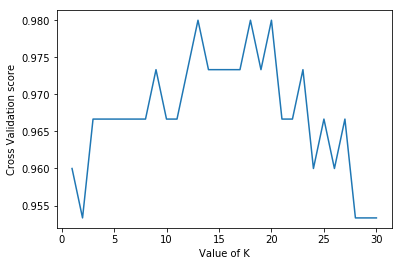

In [12]:
plt.plot(k_range,k_score)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation score")

### More Efficient parameter tuning using GridSearchCV

GridSearchCV allows you to define a set of parameters that we want to try with a given model and it will automatically run cross validation using each of those parameters keeping track of the resulting scores
Essentially, it replaces the for loop in the above code as well as providing some additional functionality

In [13]:
from sklearn.model_selection import GridSearchCV # GridsearcCV is the class

In [16]:
# Define the parameter values that should be serached
k_range = range(1,31)
k_range

range(1, 31)

In [18]:
# Create a parameter grid: It is a python dictionary in which the key is the parameter name 
# and the values are the list of values that need to be searched for that parameter.

param_grid = dict(n_neighbors = k_range)
param_grid

{'n_neighbors': range(1, 31)}

In [25]:
# Instantiate the grid: It has the same parameters as the cross_val_score but it does not include X or y 
# But it does include param_grid
# Please note that grid is an OBJECT

grid = GridSearchCV(knn, param_grid, cv = 10, scoring ="accuracy")

We can think of grid as follows its an object ready to do 10 fold cross validation on a KNN model using classification accuracy as the evaluation metrics.
Additionally, it has been given this param_grid parameter so that it knows it has to repeat the 10 fold cross val process 30 times and each time the n_neighbors parameter should be given a different value from the list

That is why the parameter grid is a dict of key:value pairs. We cant just give GridSearchCV a list of numbers because it will not know what to do with those numbers. Instead, we have to specify which model parameter in this case n_neighbors should take the values 1 to 30. 

In [26]:
## fit the grid with data
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

 **Note**: If the computer supports parallel processing then we can set n_jobs = -1 to run parallel computation

In [28]:
# View the complete result (list of named tuples)

pd.DataFrame(grid.cv_results_)[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [30]:
# examine the first result
print(grid.cv_results_["params"][0])
print(grid.cv_results_["mean_test_score"][0])
print(grid.cv_results_["std_test_score"][0])

{'n_neighbors': 1}
0.96
0.053333333333333316


In [31]:
# Create a list of mean scores only

grid_mean_score = grid.cv_results_["mean_test_score"]

In [32]:
grid_mean_score

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

Text(0, 0.5, 'Cross Validated accuracy')

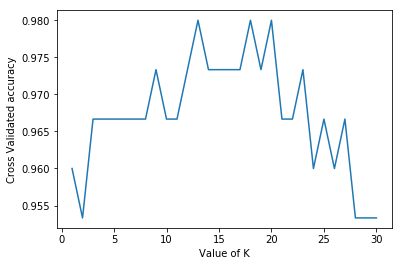

In [33]:
plt.plot(k_range, grid_mean_score)
plt.xlabel("Value of K")
plt.ylabel("Cross Validated accuracy")

This plot is identical to the plot that we created using a for loop.

Writing a list comprehension and making a plot is not the most efficient way to view the results of a grid search

In [34]:
# Once the grid is fit with data, it exposes 3 attributes that are very useful.

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_) # it is the actual model object fit with the best parameters.

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously
- Example: tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
- Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default value, and vice versa
- But, best performance might be achieved when neither parameter is at its default value. That means both parameters have some value

In [36]:
# Define the parameter values that need to be searched
k_range = range(1,31)
weight_options = ["uniform", "distance"] 

The weights parameter controls how the K nearest neighbors are weighted while making a prediction. The default option is "uniform" which means all the neighbors will be weighted equally. "distance" option weighs the neighbors as per the distance. The closer neighbors are given more weightage than the far away neighbors

In [37]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)

In [38]:
print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


In [39]:
# instantiate the grid and fit the grid
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
#View the results

pd.DataFrame(grid.cv_results_)[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [45]:
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


### Using the best parameters to make predictions

In [46]:
## Train your model with all the data and the best known parameters. 
## All the data should be used so that you dont throw away the valuable data

knn = KNeighborsClassifier(n_neighbors= 13, weights = "uniform")
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [49]:
## making a prediction
knn.predict([[3,5,4,2]])

array([1])

In [50]:
# Shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3,5,4,2]])

array([1])

## Reducing computational expense using RandomizedSearchCV
- Searching many different parameters at once may be computationally infeasible
  For eg: search 10 parameter values for each of 4 parameters will require 10,000 trials of Cross_val which will lead to 1,00,000 model fits and 1,00,000 sets of predictions if 10 fold cv is used.
- RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# For RandomizedSearchCV we specify "parameter dictribution" rather than "parameter grid"
# For discrete parameters, param_dist is same as param_grid

param_dist = dict(n_neighbors = k_range, weights = weight_options)

**Note**: Specify a continuous distribution (rather than a list of values) for any continuous parameter

In [54]:
## n_iter controls the number of serches

grid = RandomizedSearchCV(knn, param_dist, n_iter=10, cv = 10, scoring = "accuracy", random_state = 5)

In [55]:
grid.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [57]:
pd.DataFrame(grid.cv_results_)[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [58]:
print(grid.best_score_)

0.98


In [59]:
print(grid.best_params_)

{'weights': 'uniform', 'n_neighbors': 18}


## Evaluating Classification models: 


### Agenda
- What is the purpose of model evaluation, and what are some common evaluation procedures?
- What is the usage of classification accuracy, and what are its limitations?
- How does a confusion matrix describe the performance of a classifier?
- What metrics can be computed from a confusion matrix?
- How can you adjust classifier performance by changing the classification threshold?
- What is the purpose of an ROC curve?
- How does Area Under the Curve (AUC) differ from classification accuracy?

### Review of model evaluation
- Need a way to choose between models: different model types, tuning parameters, and features
- Use a model evaluation procedure to estimate how well a model will generalize to out-of-sample data
- Requires a model evaluation metric to quantify the model performance

### Model evaluation procedures
**Training and testing on the same data**
- Rewards overly complex models that "overfit" the training data and won't necessarily generalize

**Train/test split**
- Split the dataset into two pieces, so that the model can be trained and tested on different data
- Better estimate of out-of-sample performance, but still a "high variance" estimate
- Useful due to its speed, simplicity, and flexibility

**K-fold cross-validation**
- Systematically create "K" train/test splits and average the results together
- Even better estimate of out-of-sample performance
- Runs "K" times slower than train/test split

**Model evaluation metrics**
- Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- Classification problems: Classification accuracy

- There are many other evaluation metrics for classification and those metrics are the focus of todays video

## Classification accuracy

In [3]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/Ashish/Desktop/Python Tutorials/CSV files/diabetes.csv", header=None, names=col_names)

In [4]:
pima.drop(index = 0, axis = 0, inplace = True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Q. Can we predict the diabetes status of a patient given their health measurements?

In [5]:
feature_cols = ["pregnant", "insulin", "bmi", "age"]
X = pima[feature_cols]
y = pima.label

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logreg = LogisticRegression()

In [10]:
logreg.fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = logreg.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test,y_pred)

0.6927083333333334

#### Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    
whenever we use classification accuracy as our evaluation metric, its necessary to compare it with null accuracy which is the accuracy that could be achieved by always predicting the most frequent class of the testing set

Lets calculate the null accuracy for this dataset to see why this is a useful comparison

In [14]:
# examine the ditribution of the testing set (by using pandas series)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

Null Accuracy answers the question:
if my model was to predict the most predominant class 100% of the time (0 in this case), then how often would it be correct 

In [15]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [16]:
# calculate the percentage of ones
y_test.mean() # The answer should be (62/192) = 0.32

5.2135473964062504e+188

In [17]:
# Calculate the percentage of zeros
1 - y_test.mean() # The answer should be (1 - 0.32) = 0.68

-5.2135473964062504e+188

In [18]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean()) # The answer should be 0.68

5.2135473964062504e+188

In [19]:
# calculate null accuracy (for multi-class classification problems 3 or more classes)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

Since 68% > 32%, we can say that 68% is the null accuracy for this problem

In other words, a dumb model which always predicts that the patient does not have diabetes will be right 68% of the time. When we compare the null accuracy of 68% to model accuracy of 69%, our model is no longer a good model.

In [20]:
# Weakness of Classification accuracy
# print the first 25 true and predicted responses
print("True :", y_test.values[0:25])
print("Pred :", y_pred[0:25])

True : ['1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '1' '0' '0' '0']
Pred : ['0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


From the above code we can observe a pattern that when a true response value is 0 the model almost always predicts a 0. But when true response value is 1, the model rarely predicts a 1 

The model is making certin type of errors but not others. But we will never come to know that simply by measuring the accuracy.

### Conclusion:

- Classification accuracy is the easiest classification metric to understand
- But, it does not tell you the underlying distribution of response values
- And, it does not tell you what "types" of errors your classifier is making which is often important to know in real world situations

###                         Confusion matrix
  **Table that describes the performance of a classification model**

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[118,  12],
       [ 47,  15]], dtype=int64)

IMPORTANT: first argument for confusion matrix is true values(y_test), second argument is predicted values(y_pred) ALWAYS. If we pass predicted values first, then it would flip the table completely

Confusion matrix is a tally of two types of correct predictions that the classifier can make as well as the tally of two types of incorrect predictions that a classifier can make 

- Every observation in the testing set is represented in exactly one box
- It's a 2x2 matrix because there are 2 response classes. If there were 5 response classes then the matrix would be 5x5 matrix
- The format shown here is not universal

For a BINARY problem only, each of these boxes has a specific name, which is useful to memorise

**Basic terminology**

- True Positives (TP): we correctly predicted that they do have diabetes[**Bottom Right**] indicates that in 15 cases the model correctly predicted that the patient has diabetes
- True Negatives (TN): we correctly predicted that they don't have diabetes[**Upper left**] indicates that in 118 cases, the model correctly predicted that the patient does not have diabetes
- False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") [**Upper right**] indicates that in 12 cases, the model incorrectly predicted that the patient has diabetes
- False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") [**Bottom left**] in 47 cases, the model incorrectly predicted that the patient does not have diabetes

**Important**: The class encoded as 1 should be taken as positive class and class encoded as 0 should be taken as negative class
    
Thats why correctly predicting 1 is called True positive and correctly predicting 0 is called True negative    

In [23]:
#Save the confusion matrix and slice it into 4 pieces
confusion = confusion_matrix(y_test, y_pred)

In [24]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

The confusion matrix is useful in helping you to understand the performance of your classifier. But how can it help you to choose between models? Its not a model evaluation metric. So you cant simply tell scikit learn to choose the model with the best confusion matrix. However, there are many matrix that can be calculated from a confusion matrix, and those can be directly used to choose between models. Lets go through a few of the popular matrix and then at the end talk about how to choose which matrix to optimize.

### Metrics Computed from Confusion Matrix

1. **Classification accuracy:** How often the classifier is correct??

In [25]:
# Classification accuracy
(TP+TN)/(TP+TN+FP+FN)

0.6927083333333334

In [26]:
# The accuracy score function in metrics module, does the same thing
accuracy_score(y_test, y_pred)

0.6927083333333334

2. **Classification Error:** How often is the classifier incorrect?? 

Also known as "Misclassification Rate"

In [27]:
# Classification Error
(FP+FN)/(TP+TN+FP+FN)

0.3072916666666667

In [28]:
# This is same as 1-classification accuracy
1 - accuracy_score(y_test, y_pred)

0.30729166666666663

3. **Sensitivity:** When the actual value is positive, how often is the prediction correct??
    

  - How sensitive is the classifier in detecting the positive instances?
  - Also known as "True Positive Rate" or "Recall"

In [29]:
TP/(FN + TP)

0.24193548387096775

In [30]:
from sklearn.metrics import recall_score

In [31]:
recall_score(y_test, y_pred, pos_label = '1')

0.24193548387096775

4. **Specificity:** When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances.

In [32]:
Spec = TN/(TN + FP)
Spec

0.9076923076923077

- We would want to maximize the value of Sesitivity and Specificity.
- The max value of sensitivity and specificity is 1
- Hence the above classifier can be described as highly specific but not highly sensitive

5. **False Positive Rate:** When the actual value is negative, how often is the prediction **incorrect**

In [33]:
FP/(TN + FP)

0.09230769230769231

In [34]:
# False positive rate = 1 - Specificity
1 - Spec

0.09230769230769231

6. **Precision:** When a positive value is predicted, how often is the prediction correct?

In [35]:
TP / (TP + FP)

0.5555555555555556

In [36]:
from sklearn.metrics import precision_score

In [37]:
precision_score(y_test, y_pred, pos_label = '1')

0.5555555555555556

Precesion = True Positive / Actual Results

Recall = True Positive / Predicted value

Recall: How many times the classifier predicted the **correct positive** value.
Precision: Out of the total number of times classifier predicted the correct positive value, how many times was he correct?

Example of Precision and Recall:
What are the chances that Jack will be able to recall all such instances where he shared his bank details precisely? If you understood what I asked in the previous sentence with a cent per cent confidence, you have probably understood what recall and precision actually means. But, just to double check, here is my analysis. if Jack had let’s say ten such instances in reality, and he narrated twenty instances to finally spell out the ten correct instances, then his recall will be a 100%, but his precision will only be 50%.

**Conclusion:**

- Always use a confusion matrix for your classifier
- Confusion matrix gives you a more complete picture of how your classifier is performing
- Also allows you to compute various classification metrics, and these metrics can guide your model selection

**Which metrics should you focus on?**

We can optimize for any of the given metric

Choice of metric depends on your business objective
- Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)

- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Adjusting the Classification Threshold

In [39]:
logreg.predict(X_test)[0:10, :]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], dtype=object)

#### predict_proba outputs predicted probabilities of class membership.

In [41]:
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

- Each row represents one observation and each column represents a particular class. 
- There are 2 columns as there are 2 possible response classes 0 and 1 
- The first col represents the probility that the observation belongs to class 0
- The second col represents the probility that the observation belongs to class 1


- **Why might we care about the predicted probabilities?**
- Since this model predicts the likelihood of diabetes, we might rank the observations based on predicted probabilty of daabetes and prioritize our patient preventive outreach accordingly. Since it makes more sense to contact someone with 95% chance of diabetes than a 55% chance


- It seems that when we run the predict method for logistic regression, it first finds out the prob of each class and then chooses the class with highest probabilty as the predicted response. 


- Another way to look at it is, when there is a binary problem like this one, there is a threshold value set at 50%. If the prob exceeds 50% then it is predicted as 1 or else it is predicted as 0

In [42]:
# print the first 10 predicted prob of class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [90]:
# Store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

- We are now going to plot the histogram of these probabilities to help demonstrate, how adjusting the classification threshold can impact the performance of the model

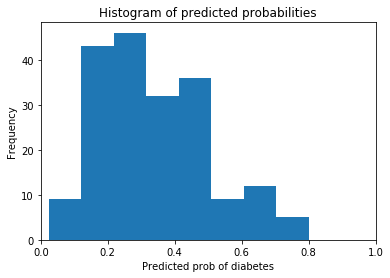

In [91]:
# Histogram of predicted probabilities
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_prob , bins = 8)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted prob of diabetes")
plt.ylabel("Frequency")
plt.rcParams["font.size"] = 14

- From the histogram it is clear that, very few observations have prob of more than 0.50
- Maximum observations (around 45) have a prob of 0.3
- If we change the value of threshold, we can change the value of **Sensitivity** and **Specificity** as per our requirement

#### Decrease the THRESHOLD to increase the SENSITIVITY of the classifier

- Threshold has been set to 0.3

In [92]:
# predict diabetes if the predicted prob is greater than 0.3
from sklearn.preprocessing import binarize

In [135]:
y_pred = binarize([y_pred_prob], 0.3)[0]

In [136]:
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [167]:
np.array(y_pred).astype(str)

array(['1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '1.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '1.0',
       '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0',
       '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0',
       '1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0',
       '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0',
       '1.0', '1.0',

In [188]:
import numpy as np
np.array(y_test).astype(str)

array(['1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1

In [189]:
print(confusion)

[[118  12]
 [ 47  15]]


In [201]:
pd.Series(y_pred).value_counts(dropna = False)

0.0    96
1.0    96
dtype: int64

In [199]:
y_test.value_counts(dropna = False)

0    130
1     62
Name: label, dtype: int64

In [202]:
y_test[0:10]

662    1
123    0
114    0
15     1
530    0
104    0
339    1
589    1
396    0
205    0
Name: label, dtype: object

In [203]:
y_pred[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [204]:
confusion_matrix(y_test, y_pred)

TypeError: '<' not supported between instances of 'float' and 'str'

- Could not find the answer for this error

- The result should:
   
   [[80,50]
    
    [16,46]]

In [205]:
# Calculating Sensitivity and Specificity

In [206]:
#Sensitivity

46/(46+16)

0.7419354838709677

In [207]:
#Specificity

80/(80+50)

0.6153846153846154

**Conclusion:**

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship. Inceasing one, will always decrease the other

Adjusting the threshold is one of the last steps we should take in the model building process. majority of the time should be given to building better models and selecting the best possible model


### ROC Curves and Area Under the Curve (AUC)

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

In [208]:
from sklearn.metrics import roc_curve

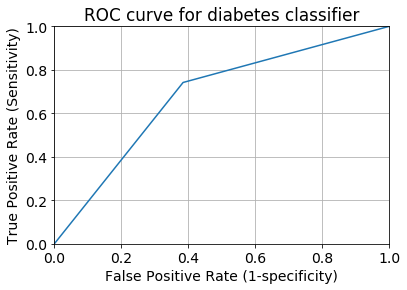

In [214]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = "1")
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

- It is a plot of Sensitivity on y-axis and 1-specificity on x-axis for all possible values of thresholds between 0 to 1
- For eg: the plot tells us that if we want to achieve a sensitivity of 0.9, we have to be willing to accept the specificty of (1-0.8) = 0.2
- The optimal ROC curve hugs the upper left corner of the plot since that would represent a classifier with high sensitivity and high specificity    
- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [218]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [219]:
evaluate_threshold(0.5)

Sensitivity: 0.7419354838709677
Specificity: 0.6153846153846154


In [220]:
evaluate_threshold(0.3)

Sensitivity: 0.7419354838709677
Specificity: 0.6153846153846154


## AUC: Area under the Curve

AUC literally means area under the ROC curve meaning the percentage of graph which is under ROC curve. As the ideal classifier would hug the upper left corner of the graph, a higher AUC value is indicative of a better overall classifier. AUC is often used as a single number summary of the performance of a classifier. AUC can be used as an alternative to classification accuracy. 

In [223]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.6786600496277917


- The best possible value for AUC is 1. if the AUC value is closer to 1, it means that we have a good classifer overall.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy). High class imbalance means one of the class is very large as compared to other. 
- For eg: If we are predicting fradulant transactions, that time, in most of the data, the transaction will not be fraudulant. Hence null accuracy will be 99% and hence classification accuracy wont be a useful measurement. AUC will be used that time

In [224]:
# AUC can be used as a scoring function for cross-val score
from sklearn.model_selection import cross_val_score

In [229]:
cross_val_score(logreg, X, y, cv=10, scoring = "roc_auc").mean()

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages

0.7378233618233618

**Confusion matrix advantages:**

- Allows you to calculate a variety of metrics
- Useful for multi-class problems (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to set a classification threshold
- Still useful when there is high class imbalance
- Less interpretable during multi-class problem

### Video 10: How do I encode categorical features using Scikit-learn?

Pipeline: The point of pipeline is to chain the steps together sequentially. Normally, we put preprocessing steps and model building steps in pipeline
    
- **Why should we build a pipeline?** 
- 2 reasons:
    1. It allows us to properly cross-validate a **process** rather than just the model. A process includes both pre-processing        and model building.
    2. We can do a grid search or a randomized search of a pipeline which allows us to do a grid or randomized search for both        tuning parameters of a model and preprocessing steps

In [230]:
import pandas as pd

In [231]:
df = pd.read_csv("http://bit.ly/kaggletrain")

In [232]:
df.shape

(891, 12)

In [233]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
# Selecting features
df.loc[:, ["Survived", "Pclass", "Sex", "Embarked"]].head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [237]:
# There are 2 rows where embarked = 0. Hence we will remove those rows

df = df.loc[df.Embarked.notna(), ["Survived", "Pclass", "Sex", "Embarked"]]

In [239]:
df.shape

(889, 4)

In [240]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Embarked    0
dtype: int64

In [241]:
df.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [242]:
# We will first start by cross-validating a model to predict survive using only the "Pclass"
# After that, we will use pipeline, one hot encoder and column transformer

In [245]:
X = df.loc[:, ["Pclass"]]

In [246]:
y = df.Survived

In [247]:
X.shape # Even if we have only one feature in X, it has to be 2 dimensional. Hence shape is 889,1

(889, 1)

In [248]:
y.shape

(889,)

In [249]:
from sklearn.linear_model import LogisticRegression

In [255]:
logreg = LogisticRegression(solver = "lbfgs")

In [256]:
from sklearn.model_selection import cross_val_score

In [258]:
cross_val_score(logreg, X, y, cv = 10, scoring = "accuracy").mean()

0.6783580183861082

In [259]:
# Comparing cross val accuracy with null accuracy
y.value_counts(normalize = True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

- This is the basic cross val model 

**Q. Now, I want to add more features to my model and cross validate it.**

Ans. We have to use pipeline

- But before that, we have to first talk about encoding the sex column and Embarked column


For encoding categorical features if they are unordered, usually the best approach is **"Dummy encoding"** in python which is also known as **"One Hot Encoding"** in scikit learn.

In [260]:
from sklearn.preprocessing import OneHotEncoder

In [261]:
ohe = OneHotEncoder(sparse = False)

OneHotEncoder like any Scikit Learn transformer has a fit and a transform method. And a Fit-transform that allows you to do both at the same time. 

In [264]:
ohe.fit_transform(df[["Sex"]])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [265]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [266]:
ohe.fit_transform(df[["Embarked"]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [267]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

- Now we would use pipline to do **"One Hot Encoding"**

In [268]:
X = df.drop("Survived", axis = "columns")

In [269]:
X.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [270]:
# Import column transformer
from sklearn.compose import make_column_transformer

- We use column transformer anytime we have features in the dataframe that require different pre-processing. This means "OneHot Encoding" is a pre-processing step. We want to apply it to "Embarked" and "Sex" columns and not on "Pclass" column as Pclass column is a numeric variable and not a categorical variable.
- Hence we will be creating a column transformer that accomplishes that objective

In [273]:
column_trans = make_column_transformer((OneHotEncoder(), ["Sex", "Embarked"]), remainder = "passthrough")

- The above code means as follows:
- I make a column transformer which says I want to apply a OneHotEncoder on "Sex" and "Embarked" columns of the dataframe, and the remainder of the columns I want to pass through

In [274]:
column_trans.fit_transform(X)

array([[0., 1., 0., 0., 1., 3.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 3.],
       ...,
       [1., 0., 0., 0., 1., 3.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 3.]])

- Output:
    1. The first two columns are OneHotEncoded columns for Sex
    2. The next 3 columns are onehotencoded columns for embarked
    3. The final column is the pass-through of Pclass column because we didnt want to encode it

In [275]:
from sklearn.pipeline import make_pipeline

In [276]:
pipe = make_pipeline(column_trans, logreg)

Important:
    1. Pipeline is for chaining steps together. So we have created a pipeline that does the following things:
    2. It takes my data that I pass it, transforms the columns which is my preprocessing step and then it builds my logreg            model.
    3. Now we will pass the entire pipeline to the cross-val score.

In [277]:
cross_val_score(pipe, X,y,cv=10, scoring = "accuracy").mean()

0.7705183861082737

- The accuracy increased from 67% to 77% meaning, the accuracy imporved by adding "Sex" and "Embarked" columns in the model 

- What happens when we run the above line of code? 
- This means I am cross-validating my entire pipeline. In other words, I am not cross-validating a model, I am cross-validating a pipeline of steps that includes pre-processing of data and model building. In other words, cross val score is going to do my 10 fold split of data and then after it splits the data it will then run the pipeline

## Making Predictions on **"New** Data" whether they surivived or not

In [279]:
X_new = X.sample(5, random_state = 99)

In [280]:
X_new

,Pclass,Sex,Embarked
599,1,male,C
512,1,male,S
273,1,male,C
215,1,female,C
790,3,male,Q


- Normally if we have built our model and evaluated it using test dataset and then we want to make predictions then what do we do? We do model.fit()
- But now we do not have a model. We have a pipeline that includes a model. So we do pipe.fit()

In [281]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [282]:
pipe.predict(X_new)

array([1, 0, 1, 1, 0], dtype=int64)

- pipe.fit is same as model.fit except it runs the pre-processing as well as the model fitting
- pipe.predict is just as model.predict except it runs pre-processing on X_new
- X_new has string series present. It converts the strings to numbers with OneHotEncoding and then does the predictions

Q. Why using OneHotEncoder, column transformer and pipeline better than using "get-dummies" in python ??

Ans. There are 4 reasons:
    1. We dont have to create a giagantic dataframe. OneHotEncoder does not effect our dataframe. Our dataframe remains the same and hence it is easier to manage.
    2. When new data comes in, we dont have to use "get-dummies" on it. Because in get-dummies, whenever an out-of-sample data comes in, we have to use get-dummies on it. Also, if the in-sample series contains 3 classes say (C,Q,S) and out-of-sample data contains 2 classes (Q and S) then it will cause problems
    3. We can do gridsearch on both model parameter and pre-processing parameters
    4. In some cases, doing cross-validation outside scikit learn can make the cross-val scores less reliable

## Recap of OneHotEncoder, Pipeline and Column_transformer

In [284]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [285]:
df = pd.read_csv("http://bit.ly/kaggletrain")
df = df.loc[df.Embarked.notna(), ["Survived", "Pclass", "Sex", "Embarked"]]
X = df.drop("Survived", axis = 1)
y = df.Survived

In [287]:
# preprocessing
column_trans = make_column_transformer((OneHotEncoder(), ["Sex", "Embarked"]), remainder = "passthrough")

In [288]:
# model creation
logreg = LogisticRegression(solver = "lbfgs")

In [289]:
# putting pre-processing and model inside a pipeline
pipe = make_pipeline(column_trans, logreg)

In [290]:
# cross-validate the entire pipeline
cross_val_score(pipe, X,y,cv=10, scoring ="accuracy").mean()

0.7705183861082737

In [291]:
X_new = X.sample(5 , random_state = 22)

In [292]:
X_new

,Pclass,Sex,Embarked
815,1,male,S
861,2,male,S
539,1,female,C
236,2,male,S
876,3,male,S
